In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import rasterio
from rasterio.plot import show

import tifffile

from bs4 import BeautifulSoup

import rioxarray

In [4]:
image_name = "ENMAP01-____L2A-DT0000004850_20221026T112131Z_005_V010201_20230421T172449Z-SPECTRAL_IMAGE.TIF"
root_path = "ENMAP01-____L2A-DT0000004850_20221026T112131Z_005_V010201_20230421T172449Z"

In [5]:
src = rasterio.open(os.path.join(root_path, image_name))

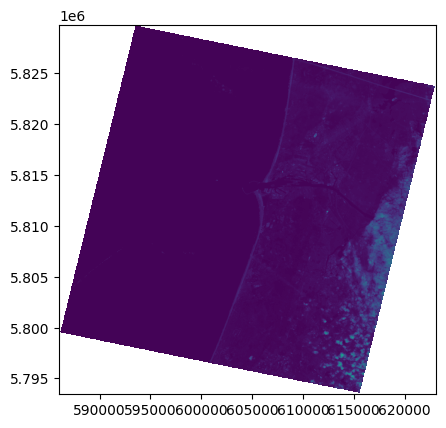

<Axes: >

In [6]:
show(src)

In [7]:
src_array = src.read()

In [8]:
src_array.shape

(224, 1212, 1236)

In [9]:
src_array = np.swapaxes(src_array, 0, 2)
src_array = np.swapaxes(src_array, 0, 1)

In [10]:
src_array.shape

(1212, 1236, 224)

In [11]:
src_array[src_array == -32768] = 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


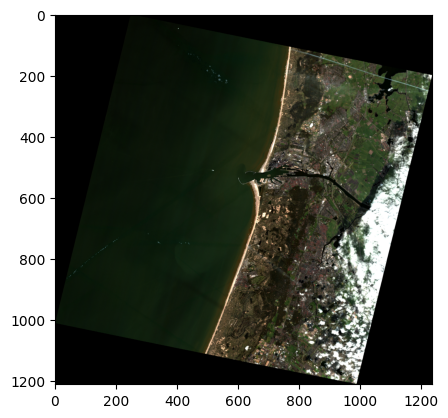

In [425]:
red = src_array[:, :, 40]
green = src_array[:, :, 22]
blue = src_array[:, :, 12]

TCI = np.stack([red * 0.95, green * 1, blue * 1], axis=2)

plt.imshow(TCI * 0.0005)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


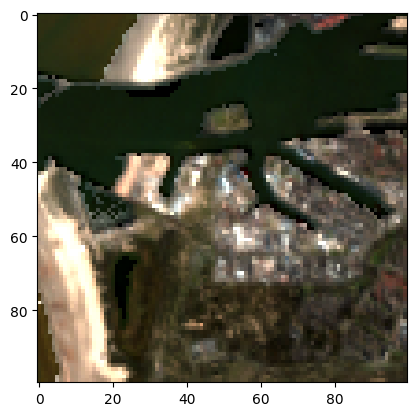

In [459]:
sample = src_array[500:600, 650:750, :]
red = sample[:, :, 40]
green = sample[:, :, 22]
blue = sample[:, :, 12]

TCI = np.stack([red * 0.95, green * 1, blue * 1], axis=2)
plt.imshow(TCI * 0.0005)

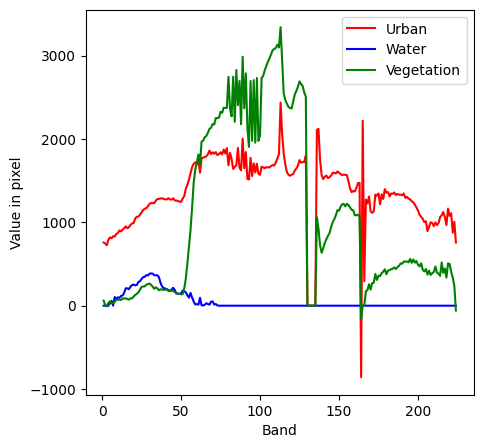

In [436]:
single_pixel_1 = src_array[550, 700, :]
single_pixel_2 = src_array[400, 600, :]
single_pixel_3 = src_array[840, 750, :]

bands = range(1, len(single_pixel)+1)

fig, ax = plt.subplots(1,1,figsize=(5,5))
plt.plot(bands, single_pixel_1, c="red")
plt.plot(bands, single_pixel_2, c="blue")
plt.plot(bands, single_pixel_3, c="green")

ax.set_xlabel("Band")
ax.set_ylabel("Value in pixel")

plt.legend(["Urban", "Water", "Vegetation"])

print("")

https://eos.com/make-an-analysis/false-color/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1235.5, 1211.5, -0.5)

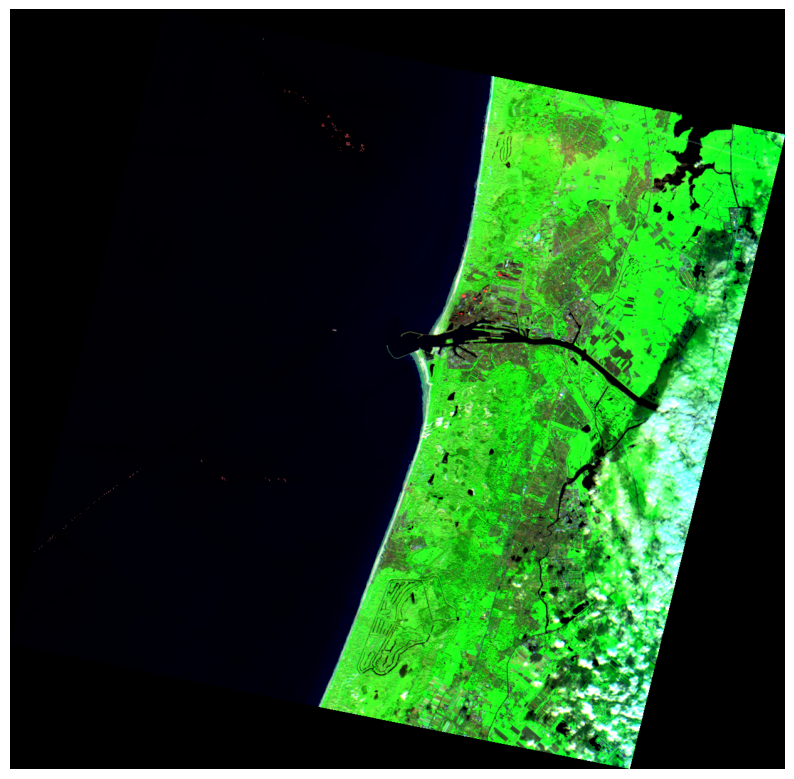

In [12]:
NIR = src_array[:, :, 101]
SWIR = src_array[:, :, 171]
red = src_array[:, :, 40]

image = np.stack([SWIR, NIR, red], axis=2)
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(image * 0.0003)
plt.axis("off")

In [13]:
red = src_array[:, :, 34]
green = src_array[:, :, 20]
blue = src_array[:, :, 6]

TCI = np.stack([red, green, blue], axis=2)

In [14]:
np.max(src_array)

19018

In [15]:
TCI.shape

(1212, 1236, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1235.5, 1211.5, -0.5)

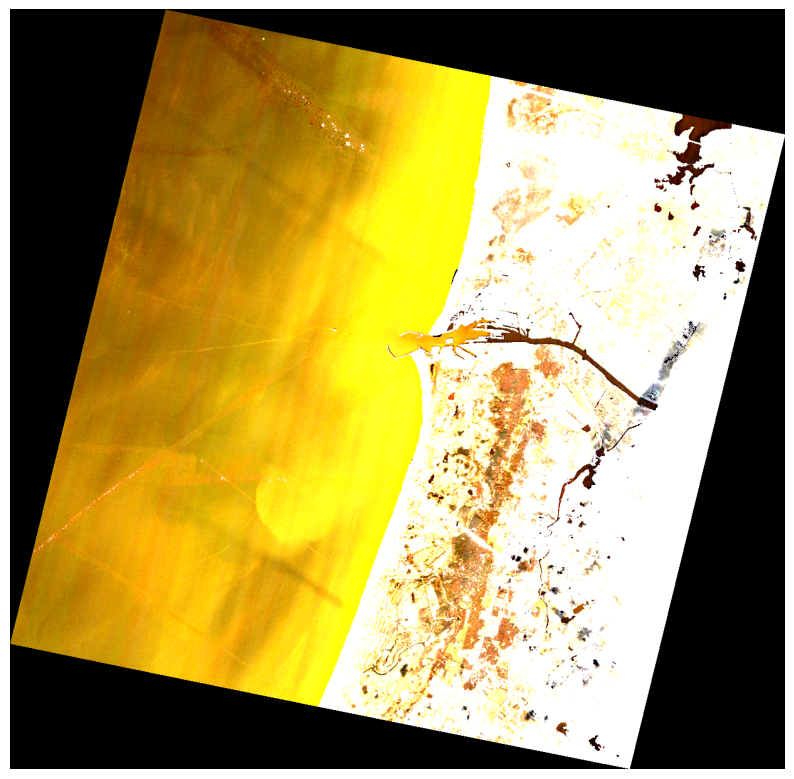

In [16]:
image = np.stack([red, green, blue], axis=2)
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(TCI)
plt.axis("off")

In [403]:
TCI.shape

(1212, 1236, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


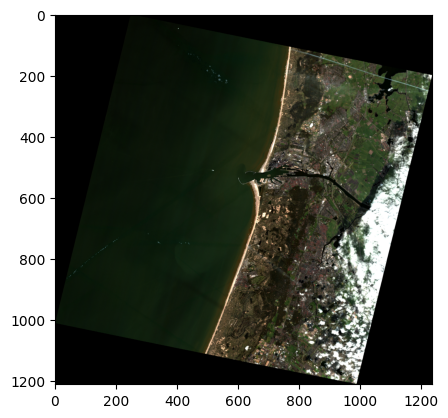

In [404]:
# fig, ax = plt.subplots(



In [405]:
NIR = src_array[:, :, 80]
red = src_array[:, :, 40]
green = src_array[:, :, 23]
blue = src_array[:, :, 12]

NDVI = (NIR-red)/(NIR+red)
NVDI_stack_blue = np.stack([NDVI, blue, green], axis=2)
NVDI_stack_red = np.stack([NDVI, red, green], axis=2)

C:\Users\win 10\AppData\Local\Temp\ipykernel_18828\4119262866.py:6: RuntimeWarning: invalid value encountered in divide
  NDVI = (NIR-red)/(NIR+red)


In [406]:
NVDI_stack_blue.shape

(1212, 1236, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


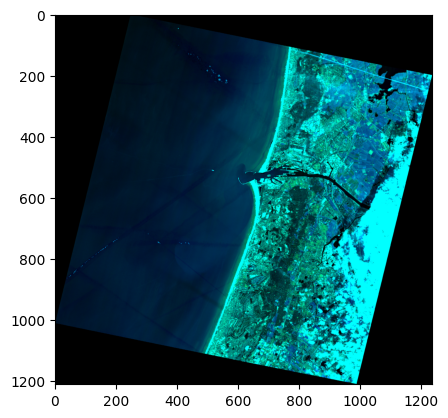

In [407]:
# fig, ax = plt.subplots(

plt.imshow(NVDI_stack_red * 0.001)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


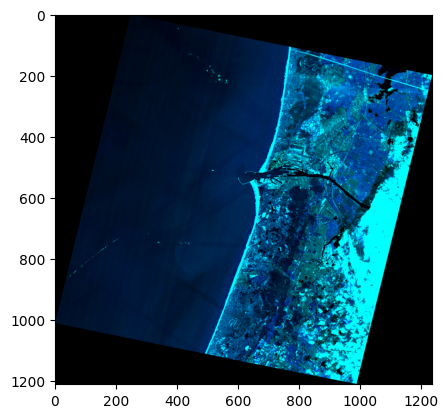

In [408]:
plt.imshow(NVDI_stack_blue * 0.001)

In [409]:
red = src_array[:, :, 40]
green = src_array[:, :, 20]
blue = src_array[:, :, 0]

# blue = np.mean(blue, axis=2)

Bath = np.stack([red * 0.5, green * 0.5, blue * 1], axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


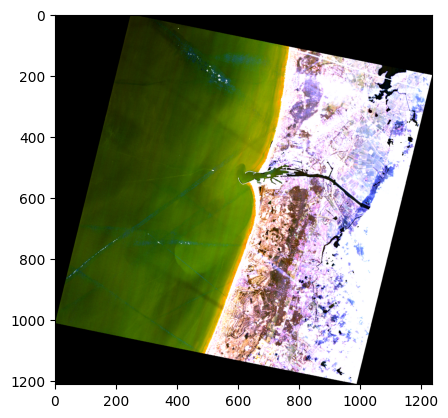

In [410]:
plt.imshow(Bath * 0.004)

The TROPOspheric Monitoring Instrument (TROPOMI), which is onboard the Copernicus Sentinel-5 Precursor, has been demonstrated to be effective in detecting methane emissions. The instrument, which has spatial resolution of about 50 square kilometers, uses ultraviolet and visible (270–500 nm), near-infrared (675–775 nm) and shortwave infrared (2305–2385 nm) spectral bands from the TROPOMI passive spectrometer.


In [411]:
SWIR = src_array[:, :, 223]
NIR = src_array[:, :, 39]
blue = src_array[:, :, 0]

TROPOMI = np.stack([SWIR, NIR, blue], axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


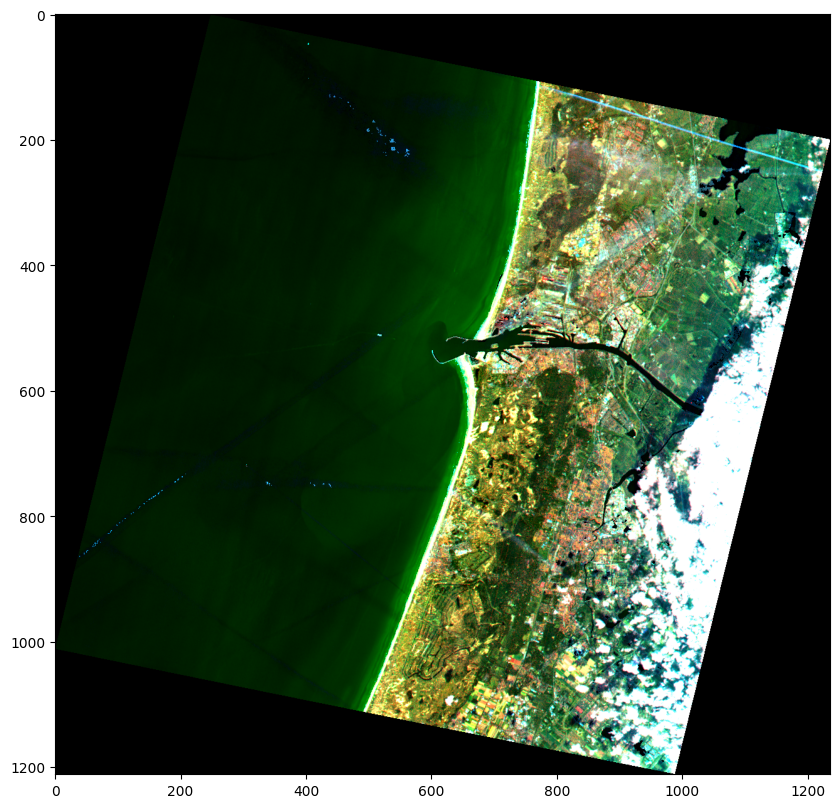

In [412]:
fig, ax, plt.subplots(1,1, figsize=(10,10))
plt.imshow(TROPOMI * 0.001)

In [208]:
red = src_array[:, :, 30:45]
green = src_array[:, :, 14:25]
blue = src_array[:, :, 3:10]

red = np.median(red, axis=2) 
green = np.median(green, axis=2)
blue = np.median(blue, axis=2)

TCI = np.stack([red, green, blue], axis=2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


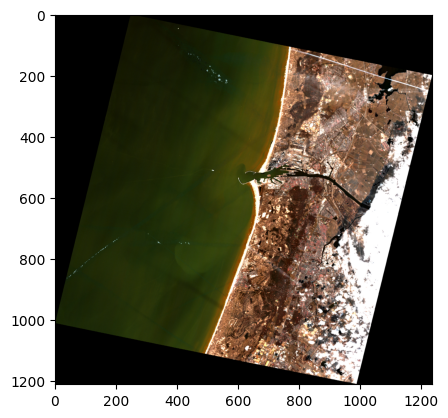

In [209]:
plt.imshow(TCI * 0.001)